In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras.metrics import Recall
from keras.metrics import Accuracy

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df = pd.read_csv('SQL_Dataset.csv')

In [5]:
df.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30919 non-null  object
 1   Label   30919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 483.2+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
X=df['Query']
y=df['Label']

In [9]:
max_words = len(list(X.str.split(' ', expand=True).stack().unique()))
max_words

36144

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
max_words = 36144
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [12]:
#def RNN():
    #inputs = Input(name='inputs',shape=[max_len])
    #layer = Embedding(max_words,64,input_length=max_len)(inputs)
    #layer = LSTM(128)(layer)
    #layer = Dense(256,name='FC1')(layer)
    #layer = Activation('relu')(layer)
    #layer = Dropout(0.2)(layer)
    #layer = Dense(1,name='out_layer')(layer)
    #layer = Activation('sigmoid')(layer)
    #model = Model(inputs=inputs,outputs=layer)
    #return model

In [13]:
from keras.models import Sequential
model = Sequential()
model.add(Embedding(max_words,64,input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1,activation="sigmoid"))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           2313216   
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2346305 (8.95 MB)
Trainable params: 2346305 (8.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [14]:
#model = RNN()
#model.summary()
#model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=[Recall()])

In [15]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=20,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/20


155/155 [==============================] - 35s 197ms/step - loss: 0.1994 - accuracy: 0.9153 - val_loss: 0.0415 - val_accuracy: 0.9899
Epoch 2/20
155/155 [==============================] - 29s 190ms/step - loss: 0.0356 - accuracy: 0.9921 - val_loss: 0.0304 - val_accuracy: 0.9927
Epoch 3/20
155/155 [==============================] - 40s 258ms/step - loss: 0.0208 - accuracy: 0.9951 - val_loss: 0.0325 - val_accuracy: 0.9943


In [16]:
X_test_sequences = tok.texts_to_sequences(X_test)
X_test_sequences_matrix = sequence.pad_sequences(X_test_sequences,maxlen=max_len)

In [17]:
accuracy = model.evaluate(X_test_sequences_matrix,y_test)

194/194 [==============================] - 8s 41ms/step - loss: 0.0288 - accuracy: 0.9940


In [18]:
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(accuracy[0],accuracy[1]))

Test set
 Loss: 0.029
 Accuracy: 0.994


In [19]:
y_pred=model.predict(X_test_sequences_matrix)

194/194 [==============================] - 10s 41ms/step


In [20]:
print(y_pred)

[[9.9988335e-01]
 [1.5556751e-04]
 [3.7540801e-04]
 ...
 [9.9575758e-01]
 [3.5170648e-01]
 [4.7293594e-03]]


In [21]:
for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    elif y_pred[i]<=0.5:
        y_pred[i]=0

In [22]:
print(y_pred)

[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
confusion_matrix(y_test, y_pred)  
plt.show()
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred, zero_division=1)
recall= recall_score(y_test, y_pred, zero_division=1)
f1_score= f1_score(y_test, y_pred, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2} \n F1 : {3}".format(accuracy, precision, recall, f1_score))

 Accuracy : 0.9940168175937905 
 Precision : 0.9969135802469136 
 Recall : 0.986905281536447 
 F1 : 0.9918841851283177


In [24]:
from keras.models import load_model
from pathlib import Path

model.save_weights("lstm_weights_newlink.h5")
print('done')

model.save('lstm_model_newlink.h5')

done


C:\Users\Huang\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
loaded_model = tf.keras.models.load_model('lstm_model_newlink.h5')
loaded_model.load_weights('lstm_weights_newlink.h5')

In [26]:
def clean_data(input_val):

    txts = tok.texts_to_sequences(input_val)
    input_val = sequence.pad_sequences(txts, maxlen=max_len)

    return input_val


def predict_sqli_attack():
    
    repeat=True
    
    space=''
    for i in range(20):
        space+= "-"

    print(space) 
    input_val=input("Please enter some data: ")
    print(space)

    
    if input_val== '0':
        repeat=False
    
    sample_texts_list = []
    sample_texts_list.append(input_val)
    txts = tok.texts_to_sequences(sample_texts_list)
    txts = sequence.pad_sequences(txts, maxlen=max_len)

    result=loaded_model.predict(txts)
    print(result)


    print(space)
    
    
    if repeat == True:
            if result > 0.5:
                 print("ALERT! This can be SQL injection")
            elif result <= 0.5:
                 print("It seems to be a benign")
            
            print(space)
        
            predict_sqli_attack()
            
    elif repeat == False:
        print( " Closing ")

<Axes: xlabel='Label'>

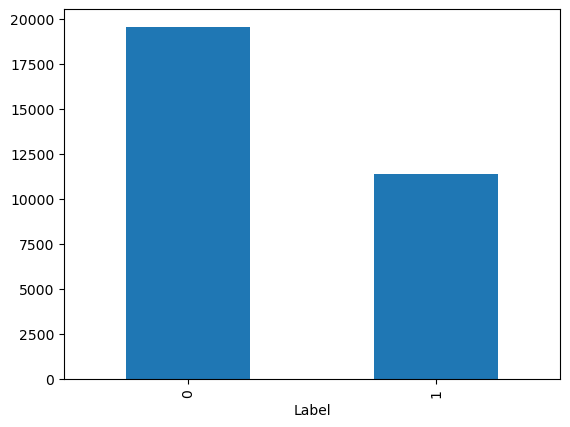

In [27]:
df.groupby('Label')['Query'].count().plot.bar()

In [28]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[3886    7]
 [  30 2261]]


<Axes: >

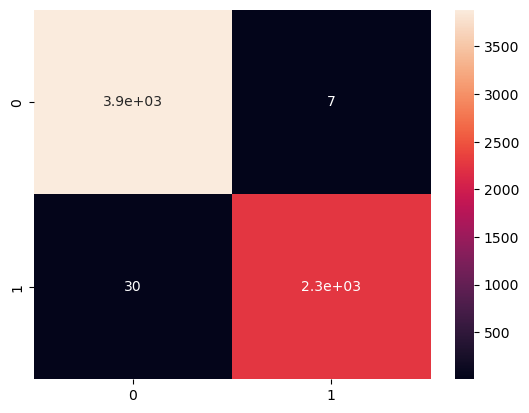

In [29]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [30]:
y_pred.shape

(6184, 1)

In [31]:
predict_sqli_attack()

--------------------
Please enter some data: '
--------------------
1/1 [==============================] - 2s 2s/step
[[0.06142996]]
--------------------
It seems to be a benign
--------------------
--------------------
Please enter some data: AND
--------------------
1/1 [==============================] - 0s 49ms/step
[[0.08966232]]
--------------------
It seems to be a benign
--------------------
--------------------
Please enter some data: OR
--------------------
1/1 [==============================] - 0s 105ms/step
[[0.61269516]]
--------------------
ALERT! This can be SQL injection
--------------------
--------------------
Please enter some data: Ball or apple
--------------------
1/1 [==============================] - 0s 141ms/step
[[0.42968333]]
--------------------
It seems to be a benign
--------------------
--------------------
Please enter some data: UNION SELECT
--------------------
1/1 [==============================] - 0s 77ms/step
[[0.55134475]]
--------------------
ALERT